# Notebook 15: Best-fit fold axis

## Tensors:

A tensor is a physical entity that can be transformed from one coordinate system to another, changing its components in a predictable way, but without changing its fundamental nature, such that the tensor is independent of the coordinate system. Thus, scalars and vectors are tensors. More specifically, scalars are zero order and vectors are first order tensors. In this notebook, we will look at second order tensors which are commonly referred to as tensors.

In three dimensions, a tensor is characterized by nine components:

$$\mathbf{T}=T_{i j}=\left[\begin{array}{lll}
T_{11} & T_{12} & T_{13} \\
T_{21} & T_{22} & T_{23} \\
T_{31} & T_{32} & T_{33}
\end{array}\right]$$

The nine components of the tensor $T_{ij}$ give the values of the tensor with reference to the three axes of the coordinate system. If we change the axes orientations, then the nine components will change but, similar to a vector, the tensor itself will not change.

If $T_{ij} = T_{ji}$, the tensor is symmetric, and there is one orientation of the coordinate axes for which all the components except those along the principal diagonal, are zero:

$$\mathbf{T}=T_{i j}=\left[\begin{array}{ccc}
T_{11} & 0 & 0 \\
0 & T_{22} & 0 \\
0 & 0 & T_{33}
\end{array}\right]=\left[\begin{array}{ccc}
T_2 & 0 & 0 \\
0 & T_1 & 0 \\
0 & 0 & T_3
\end{array}\right]$$

Under this condition, the values along the diagonal are the principal axes of the tensor. Based on their magnitude, these axes are ranked as the maximum ($T_1$), intermediate ($T_2$), and minimum ($T_3$) principal axes. Determining the orientation of the coordinate system whose axes are parallel to the principal axes of a symmetric tensor involves solving the eigenvalue problem, i.e. finding the eigenvalues and eigenvectors of the tensor (Allmendinger et al., 2012).

## Best-fit fold axis:

We will now focus on a problem that relies on solving the eigenvalue problem for a symmetric tensor: How do we find the best-fit fold axis to a group of bedding poles?

The solution to this problem is based on the least squares method (Charlesworth et al., 1976). Suppose we want to calculate the axis $\mathbf{f}$ of a fold. If the fold is truly cylindrical, then all the bedding poles $\mathbf{p}_{[n]}$ should be perpendicular to $\mathbf{f}$, i.e. the angle $\theta_i$ between any pole $\mathbf{p}_{[i]}$ and
$\mathbf{f}$ should be 90°, and $\cos\theta_i$ should be zero (Figure below). 

<img src="../figures/bestfit_fold_axis.png" alt="bestfit_fold_axis" width="400" style="display: block; margin: 0 auto"/><br><br>

$\cos\theta_i$ is the dot product of $\mathbf{f}$ and $\mathbf{p}_{[n]}$. Treating the poles as row vectors, the dot product can be written as:

$$\cos \theta_i=\mathbf{p}_{[i]} \mathbf{f}^{\mathbf{T}}$$

We can use the value of $\cos\theta_i$ to represent the deviation of a pole $\mathbf{p}_{[i]}$ from $\mathbf{f}$. The sum of the squares of the deviations of all the poles is:

$$S=\sum_{i=1}^n \cos ^2 \theta_i=\sum_{i=1}^n\left(\mathbf{p}_{[i]} \mathbf{f}^{\mathbf{T}}\right)^2$$

Since the dot product is conmutative ($\mathbf{p}_{[i]} \mathbf{f}^{\mathbf{T}}=\mathbf{f p}_{[i]}^{\mathbf{T}}$), we can write the equation above as:

$$S=\sum_{i=1}^n \mathbf{f p}_{[i]}^{\mathbf{T}} \mathbf{p}_{[i]} \mathbf{f}^{\mathbf{T}}=\mathbf{f} \mathbf{T f}^{\mathbf{T}}$$

$\mathbf{T}$ is a symmetric tensor known as the *orientation tensor* and is composed of the sum of the dyad products of each pole $\mathbf{p}_{[i]}$ ($[\cos\alpha_i, \cos\beta_i, \cos\gamma_ i]$) with itself:

$$
\begin{aligned}
\mathbf{T} & =\sum_{i=1}^n \mathbf{p}_{[i]}^{\mathbf{T}} \mathbf{p}_{[i]}=\sum_{i=1}^n\left(p_i p_j\right)_{[i]} \\
& =\left[\begin{array}{ccc}
\sum \cos ^2 \alpha_{[i]} & \sum \cos \alpha_{[i]} \cos \beta_{[i]} & \sum \cos \alpha_{[i]} \cos \gamma_{[i]} \\
\sum \cos \beta_{[i]} \cos \alpha_{[i]} & \sum \cos ^2 \beta_{[i]} & \sum \cos \beta_{[i]} \cos \gamma_{[i]} \\
\sum \cos \gamma_{[i]} \cos \alpha_{[i]} & \sum \cos \gamma_{[i]} \cos \beta_{[i]} & \left.\sum \cos ^2 \gamma_{[i]}\right]
\end{array}\right]
\end{aligned}
$$

$\mathbf{T}$ describes an ellipsoid in three-dimensions. To find the principal axes of this ellipsoid, we need to calculate the eigenvalues and eigenvectors of $\mathbf{T}$. The smallest eigenvalue of $\mathbf{T}$ is the minimization of the deviations $S$. If the fold were perfectly cylindrical, the lowest eigenvalue would be zero. Thus, the eigenvector corresponding to the lowest eigenvalue is the best-fit fold axis $\mathbf{f}$.

## Python function

The function [bingham](../functions/bingham.py) computes and plots a cylindrical best-fit to a distribution of bedding poles. It returns the eigenvalues and eigenvectors of $\mathbf{T}$, the uncertainty cones for the Bingham statistics, and the best-fit plane to the bedding poles. For more information on the Bingham statistics, please check Fisher et al. (1987).

## Application

The Bear Valley strip mine near Shamokin, Pennsylvania is a remarkable outcrop (Nickelsen, 1979). It exposes an anticline in Upper Carboniferous sandstones, which is known as the Whaleback anticline (Figure below). 

<img src="../figures/whaleback.jpg" alt="whaleback" width="600" style="display: block; margin: 0 auto"/><br><br>

This is one of the best 3D exposures of folded rocks worldwide. An online game based on this anticline (Needle et al., 2022) is available [here](https://www.virtualfieldgeology.com/whaleback.html). 

The file [whaleback.txt](../data/whaleback.txt) contains the strikes and dips of planes across the anticline. These measurements were obtained using the online game. Compute the fold axis:

Best-fit fold axis: trend = 79.8, plunge = 1.7
Best-fit plane: strike = 169.8, dip = 88.3

95% elliptical confidence cones:
Around axis 1: Max = 22.7, Min = 1.0
Around axis 3: Max = 1.3, Min = 1.0


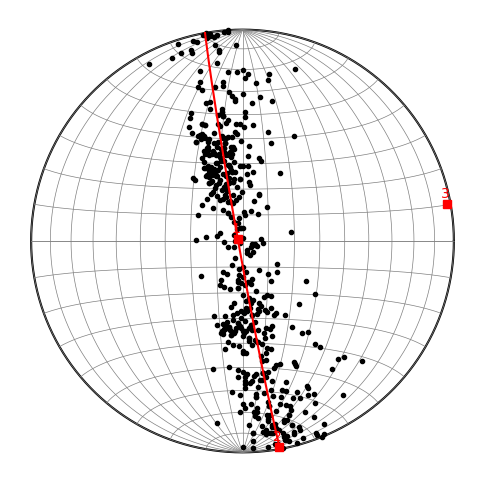

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt 
rad = 180/np.pi

# this makes visible our functions folder
import sys , os 
sys.path.append(os.path.abspath(os.path.join("..", "functions")))

# import pole_from_plane and bingham functions
from pole import pole_from_plane
from bingham import bingham

# read the strike and dip data, and convert to radians
data = np.loadtxt(os.path.join("..","data","whaleback.txt"), skiprows=1)
data = data / rad

# compute the poles to the bedding planes
n = data.shape[0]
poles = np.zeros((n,2))
for i in range(n):
    # pole's trend and plunge
    poles[i,0], poles[i,1] = pole_from_plane(data[i,0], data[i,1])

# compute cylindrical best fit and plot in equal area stereonet
fig, ax = plt.subplots(figsize=(6,6))
ev, conf, bf = bingham(poles[:,0], poles[:,1], 1, ax)

# convert from radians to degrees
ev = ev * rad 
conf = conf * rad 
bf = bf * rad

# print best -fit fold axis
print(f"Best-fit fold axis: trend = {ev[2,1]:.1f}, plunge = { ev[2,2]:.1f}")
# print best -fit plane
print(f"Best-fit plane: strike = {bf[0]:.1f}, dip = {bf[1]:.1f}\n")
# print confidence cone
print("95% elliptical confidence cones:")
print(f"Around axis 1: Max = {conf[0,0]:.1f}, Min = {conf[0,1]:.1f}")
print(f"Around axis 3: Max = {conf[1,0]:.1f}, Min = {conf[1,1]:.1f}")

The fold axis trends 80° and is almost horizontal, although locally at the E and W ends of the exposed anticline, it plunges gently E and W, respectively. 